In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import pickle

In [2]:
sns.set_style("whitegrid")

# Factor Analysis

In [3]:
factors = pd.read_csv("./results/factor.csv")

In [4]:
factors

,Factor,Training Time,Scoring Time,Kernel Evaluations
0,Baseline,1.0,39500.0,200000
1,1% Tolerance,2.2,25000.0,100000
2,p99 Cutoff,2.2,500.0,50000
3,Tol+Cutoff,2.2,10.0,1000
4,EquiWidth,2.2,4.6,1000
5,Grid,3.0,3.2,300


In [7]:
def make_factor_chart(ys):
    xs = np.array(range(len(ys)))
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.bar(
        xs + 0.5,
        ys,
        log=True,
    )
    rects = ax.patches
    for rect, label in zip(rects, ys):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width()/2, 
            height,
            label,
            ha='center', va='bottom',
        )

    ax.grid(False, axis='x')
    ax.set_xticks(xs+1)
    return fig,ax

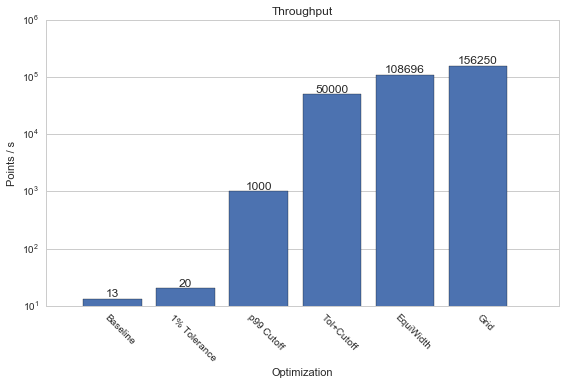

In [8]:
throughput = np.round(500000 / factors["Scoring Time"]).astype(int)
fig, ax = make_factor_chart(throughput)
ax.set_xticklabels(list(factors["Factor"]), rotation=-45)
ax.set_title("Throughput")
ax.set_ylabel("Points / s")
ax.set_xlabel("Optimization")
fig.tight_layout()
fig.savefig("./figures/factor.pdf")

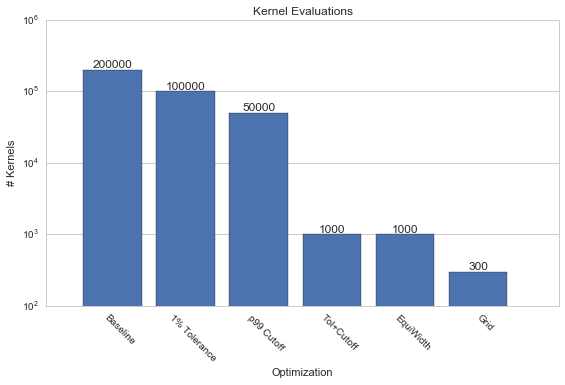

In [9]:
fig, ax = make_factor_chart(factors["Kernel Evaluations"])
ax.set_xticklabels(list(factors["Factor"]), rotation=-45)
ax.set_title("Kernel Evaluations")
ax.set_ylabel("# Kernels")
ax.set_xlabel("Optimization")
fig.tight_layout()
fig.savefig("./figures/kernel_count.pdf")

# Impact of Quantile Estimation Precision

In [29]:
quantiles = pd.read_csv("./results/quantile_impact.csv")
quantiles

,Percentile,Ratio,Runtime
0,1.0,1.0,2.0
1,1.5,1.1,2.5
2,2.0,1.3,3.5
3,4.0,2.0,6.0
4,10.0,3.0,10.0


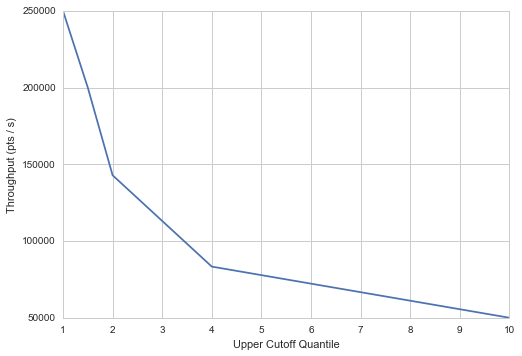

In [43]:
fig = plt.figure()
ax = plt.subplot(111)
throughput = 500000/quantiles["Runtime"]
ax.plot(quantiles["Percentile"],throughput)
ax.set_xlabel("Upper Cutoff Quantile")
ax.set_ylabel("Throughput (pts / s)")
fig.savefig("./figures/cutoff_quantile_throughput.pdf")

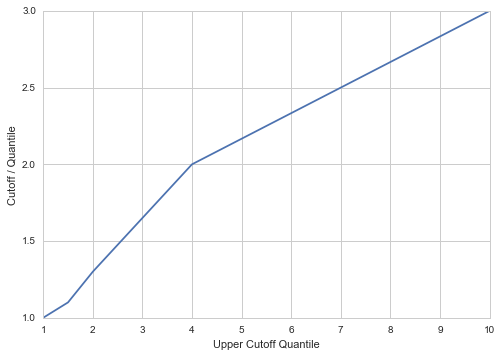

In [44]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(quantiles["Percentile"],quantiles["Ratio"])
ax.set_xlabel("Upper Cutoff Quantile")
ax.set_ylabel("Cutoff / Quantile")
fig.savefig("./figures/cutoff_quantile_ratio.pdf")

# Accuracy

Table
CDF comparison

# Scalability

In [38]:
dimensions = pd.read_csv("./results/scalability_dimension.csv")
dimensions

,dimension,runtime
0,1,3
1,2,5
2,3,6
3,4,10
4,5,11
5,6,15
6,7,20
7,8,30
8,16,50
9,32,80


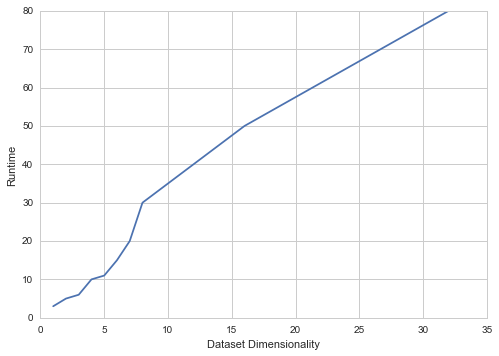

In [45]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(dimensions["dimension"],dimensions["runtime"])
ax.set_xlabel("Dataset Dimensionality")
ax.set_ylabel("Runtime")
fig.savefig("./figures/scalability_dim.pdf")

In [40]:
size = pd.read_csv("./results/scalability_size.csv")
size

,size,runtime
0,5000,0.002
1,10000,0.010
2,50000,0.100
3,100000,1.000
4,500000,10.000
5,1000000,35.000


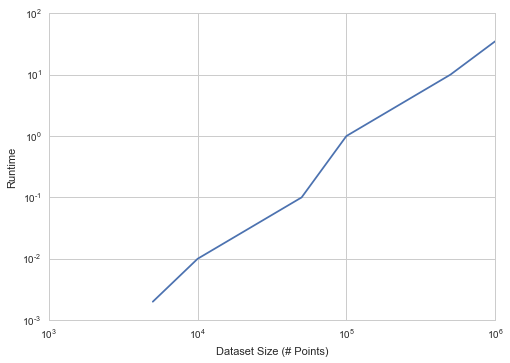

In [47]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(size["size"],size["runtime"])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Dataset Size (# Points)")
ax.set_ylabel("Runtime")
fig.savefig("./figures/scalability_size.pdf")